### <strong>主題:
啤酒評論評分預測
### <strong>說明:
這是一份包含對不同種啤酒的評鑑資料集，我們最終目標是以其中的文字評論為輸入 <br />
，建構BERT模型，評估其各項屬性(apperance, aroma, overall, palate, taste)得分。
### <strong>題目
1. 在各項屬性中的評分結為0, 0.5, ..., 5的分數，請依照其分布狀況，評估<br />
應該將其分成多少群目標類別來做預測。例如，0\~2分為一群、2\~4分為一群、...
2. 請分每個評論的長度為多少，並請依照其長度分數評估出後續BERT模型所使用的最<br />
大長度。<br />
#### <strong>提示: 最大不可超過BERT限制512

# 1.在各項屬性中的評分結為0, 0.5, ..., 5的分數，請依照其分布狀況，評估應該將其分成多少群目標類別來做預測。例如，0\~2分為一群、2\~4分為一群、...

In [43]:
import numpy as np
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt


train = pd.read_json("train_set.json")
test = pd.read_json("test_set.json")

train = train.append(test).reset_index(drop=True)

In [23]:
review_attrs_raw = ['review/appearance', 'review/aroma', 'review/overall', 'review/palate', 'review/taste']
review_attrs_group = ['review_appearance', 'review_aroma', 'review_overall', 'review_palate', 'review_taste']

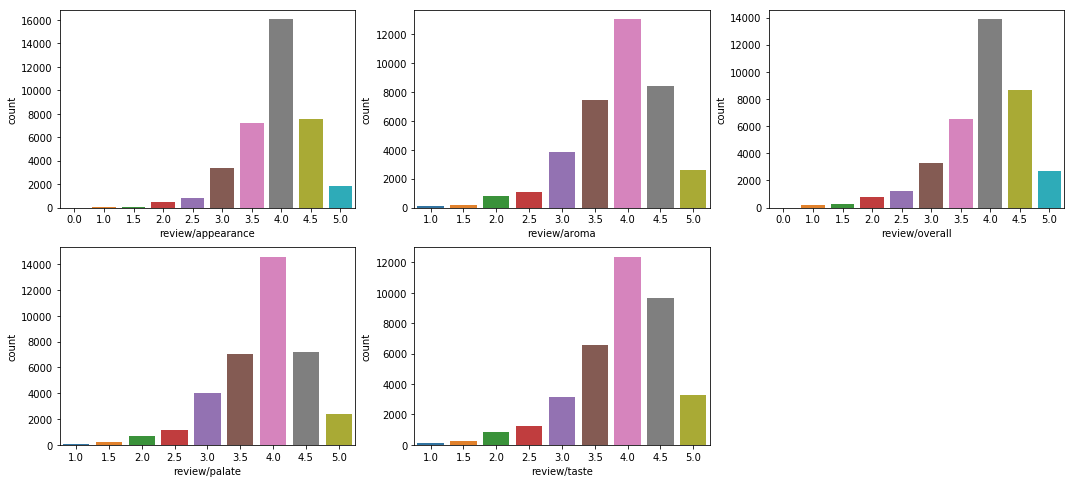

In [21]:
plt.figure(figsize=(18,8))
for i, review_attr in enumerate(review_attrs_raw, 1):
    plt.subplot(2,3,i)
    sns.countplot(train[review_attr])

```
分組
score <= 3.5 --> 1
score == 4   --> 2
score >= 4.5 --> 3
```

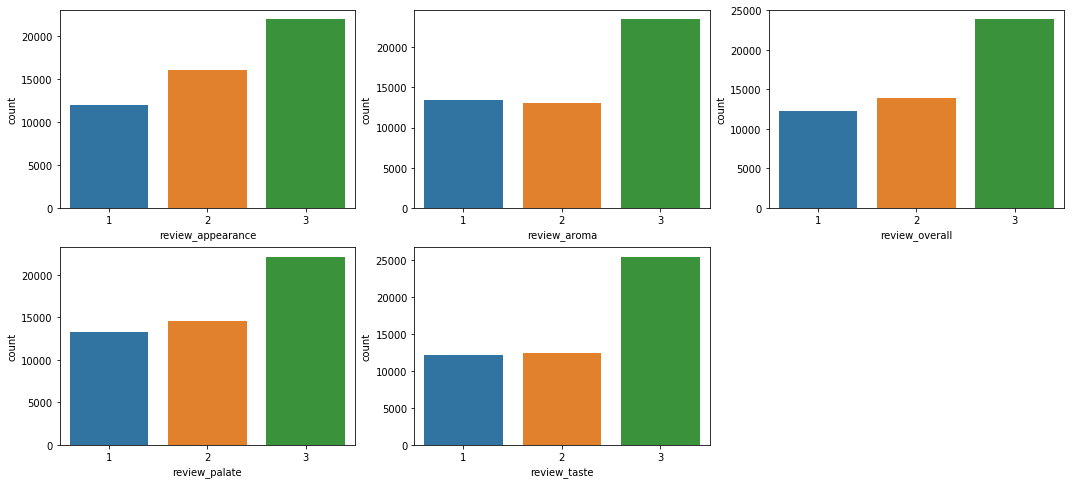

In [34]:
plt.figure(figsize=(18,8))
for i, review_attr in enumerate(review_attrs_group, 1):
    plt.subplot(2,3,i)
    sns.countplot(train[review_attr])

### 2. 請分每個評論的長度為多少，並請依照其長度分數評估出後續BERT模型所使用的最大長度。

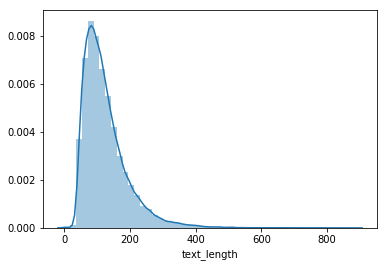

In [42]:
sns.distplot(train['text_length'])

In [51]:
train['text_length'].describe(np.linspace(0.9, 0.99, 10))

count    50000.000000
mean       125.502080
std         68.986175
min          1.000000
50%        109.000000
90%        211.000000
91%        218.000000
92%        226.000000
93%        233.070000
94%        243.000000
95%        256.000000
96%        270.000000
97%        290.000000
98%        322.000000
99%        372.000000
max        886.000000
Name: text_length, dtype: float64

# 選擇模型所使用的最大長度 = 256